- 原文 [A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- 译文 [时间序列预测全攻略（附带Python代码）](http://www.36dsj.com/archives/44065)
- [代码](https://github.com/aarshayj/Analytics_Vidhya/blob/master/Articles/Time_Series_Analysis/Time_Series_AirPassenger.ipynb) python2.7+
- 大部分时间序列模型的前提是稳定，稳定的标准是：
  - 恒定的平均数
  - 恒定的方差
  - 不随时间变化的自协方差
- 稳定性测试：
  - 绘制滚动统计曲线
  - DF检验
- 消除趋势
  - 聚合：取一段时间的平均值
  - 平滑
    - 取滚动平均数
      - 原始值减去滚动平均值来消除趋势
      - 缺点：需要严格定义时段，如案例中采用年平均，而对于复杂的时序结构，平均值不容易获取
    - 加权移动平均法
  - 多项式回归分析：适合的回归模型
- 消除季节性
  - 差分：采用一个特定时间差的差值
  - 分解：建立有关趋势和季节性的模型，从模型中删除

# 初步认识ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('AirPassengers.csv')
del data['Unnamed: 0']
del data['time']
data['Month'] = pd.date_range('19490101', '19601201', freq='MS')
data = data.set_index(data['Month'])
del data['Month']
print data.head()
print '\n Data Types:'
print data.dtypes
print '\n Data Index:'
print data.index

            AirPassengers
Month                    
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121

 Data Types:
AirPassengers    int64
dtype: object

 Data Index:
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)


In [4]:
ts = data['AirPassengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: AirPassengers, dtype: int64

- 大部分时间序列模型的前提是稳定
- 标准
 - 恒定的平均数
 - 恒定的方差
 - 不随时间变化的自协方差

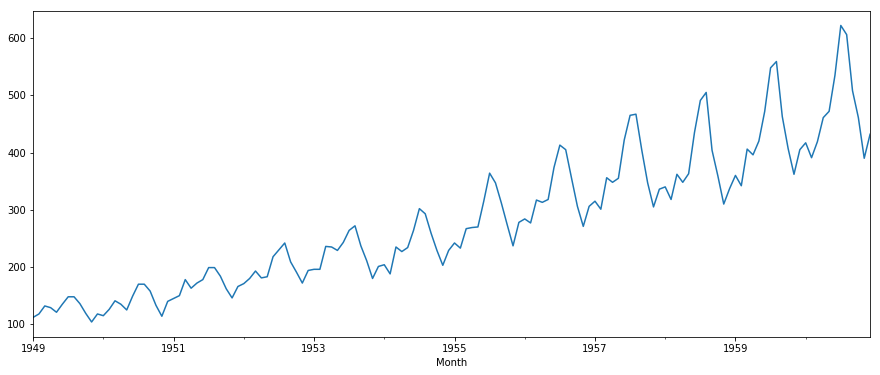

In [5]:
ts.plot()

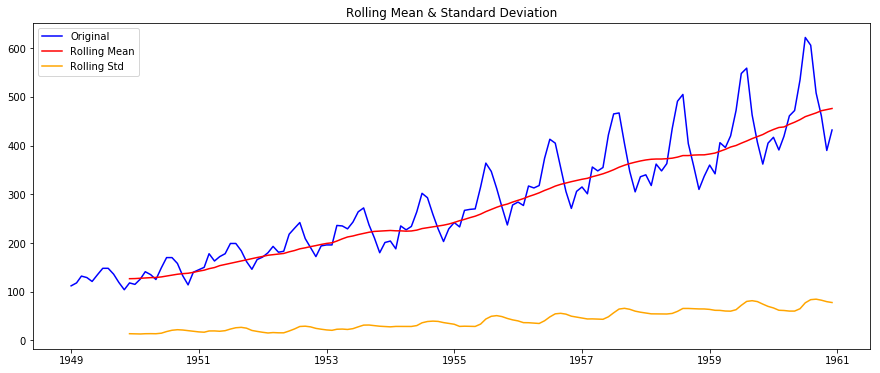

Results of Dickey-Fuller Test:


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # 绘制滚动统计
    rol_mean = timeseries.rolling(window=12).mean()
    rol_std = timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rol_mean, color='red', label='Rolling Mean')
    std = plt.plot(rol_std, color='orange', label='Rolling Std')

    plt.legend(loc='best')  # 图例位置
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()  # plt.show(0)/plt.show(block=False)绘图的同时继续跑下面代码
    
    #DF检验
    print 'Results of Dickey-Fuller Test:'
test_stationarity(data)

### DF检验

### 消除趋势
- 聚合：取一段时间的平均值
- 平滑：取滚动平均数
- 多项式回归分析：适合的回归模型

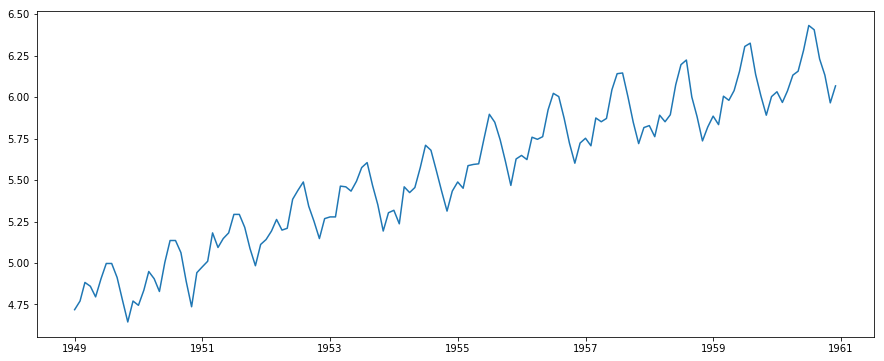

In [124]:
ts_log = np.log(ts)
plt.plot(ts_log)

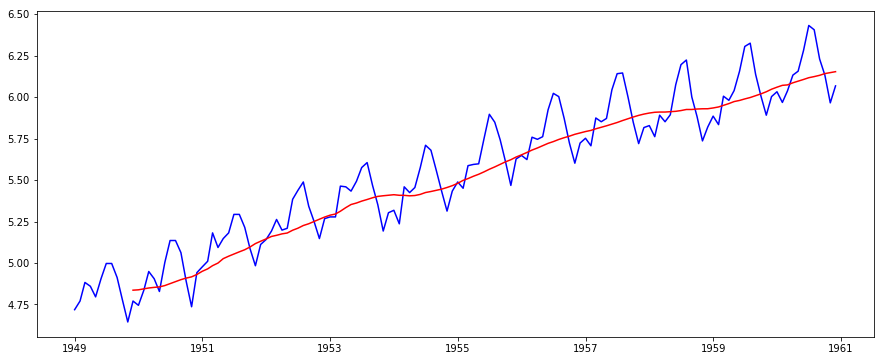

In [125]:
moving_avg  = ts_log.rolling(window=12).mean()
orig = plt.plot(ts_log, color='blue', label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
plt.show()

### 平滑
- 原始值减去滚动平均值来消除趋势
- 缺点：需要严格定义时段，如案例中采用年平均，而对于复杂的时序结构，平均值不容易获取

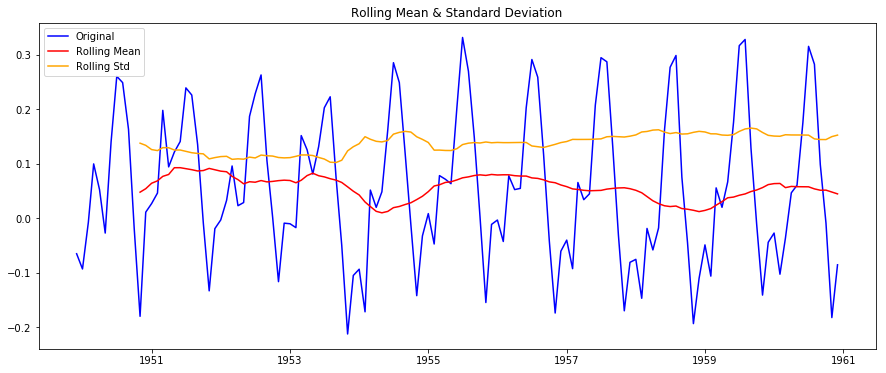

In [132]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff = ts_log_moving_avg_diff.dropna()
test_stationarity(ts_log_moving_avg_diff)

### 加权移动平均法
- 

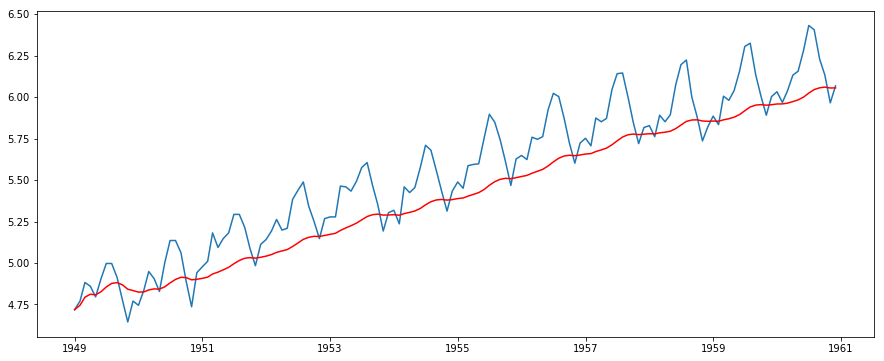

In [135]:
expwighted_avg  = ts_log.ewm(halflife=12).mean()  # 指数加权移动平均值
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

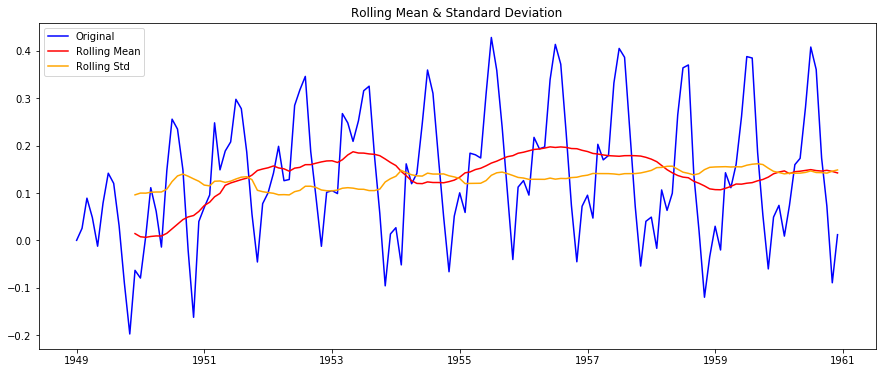

In [136]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

### 消除季节性
- 差分：采用一个特定时间差的差值
- 分解：建立有关趋势和季节性的模型，从模型中删除

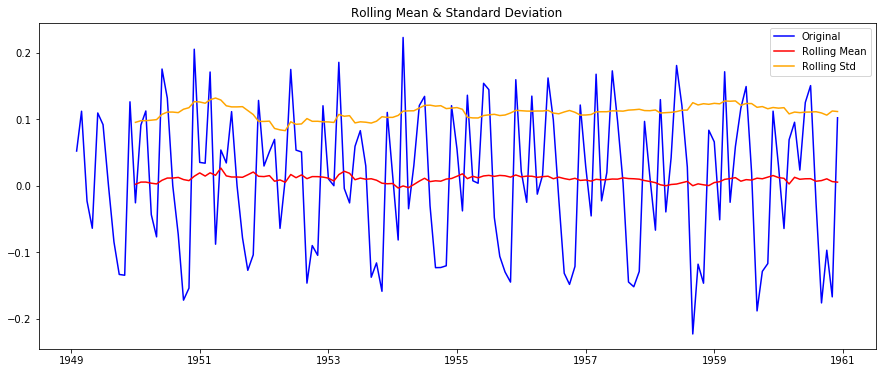

In [140]:
# ts_log.shift()  # 数据下移
ts_log_diff = ts_log - ts_log.shift()  # 计算差值
ts_log_diff = ts_log_diff.dropna()
test_stationarity(ts_log_diff)